In [33]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error
import random
from sklearn import preprocessing
# 让图片中可以显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
# 让图片中可以显示负号
plt.rcParams['axes.unicode_minus'] = False



ValueError: s must be a scalar, or float array-like with the same size as x and y

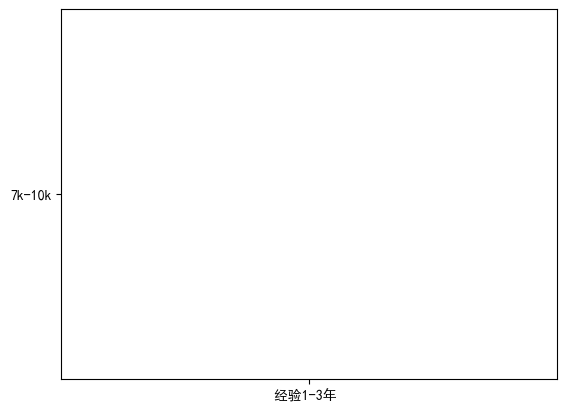

In [14]:
df = pd.read_csv("lagou.csv")
df

In [46]:


le = preprocessing.LabelEncoder()
df["experience"] = le.fit_transform(df["experience"])
df["salary"] = le.fit_transform(df["salary"])

def fun(x):
	return re.findall('[a-zA-Z]+',x)
df["description_type"] = df["description"].apply(fun)
df["description_type_num"] = df["description_type"].apply(lambda  x:len(x))
df["description_type_num"]


0      6
1      6
2      1
3      5
4      3
      ..
431    1
432    1
433    1
434    7
435    2
Name: description_type_num, Length: 436, dtype: int64

In [19]:
# 选择两个主要维度作为x轴和y轴
x = df['experience']
y = df['salary']

0      77
1      25
2       1
3      27
4      20
       ..
431    76
432    64
433    63
434    25
435     1
Name: salary, Length: 436, dtype: int32

In [39]:
# 使用颜色映射表示行业
colors = plt.cm.get_cmap('viridis', len(df['foursquare'].unique()))  # 假设你有多种行业，这里使用viridis颜色映射
industry_to_color = {industry: colors(i) for i, industry in enumerate(df['foursquare'].unique())}
colors_for_points = [industry_to_color[industry] for industry in df['foursquare']]
# 使用大小映射表示技能数量（注意：点的大小可能需要根据实际情况进行调整）
sizes = df["description_type_num"]  # 假设技能数量在0-10之间，这里简单地将技能数量乘以10作为点的大小

[(0.267004, 0.004874, 0.329415, 1.0),
 (0.272594, 0.025563, 0.353093, 1.0),
 (0.277018, 0.050344, 0.375715, 1.0),
 (0.280267, 0.073417, 0.397163, 1.0),
 (0.282327, 0.094955, 0.417331, 1.0),
 (0.283197, 0.11568, 0.436115, 1.0),
 (0.282884, 0.13592, 0.453427, 1.0),
 (0.281412, 0.155834, 0.469201, 1.0),
 (0.278826, 0.17549, 0.483397, 1.0),
 (0.275191, 0.194905, 0.496005, 1.0),
 (0.283197, 0.11568, 0.436115, 1.0),
 (0.270595, 0.214069, 0.507052, 1.0),
 (0.265145, 0.232956, 0.516599, 1.0),
 (0.258965, 0.251537, 0.524736, 1.0),
 (0.252194, 0.269783, 0.531579, 1.0),
 (0.275191, 0.194905, 0.496005, 1.0),
 (0.272594, 0.025563, 0.353093, 1.0),
 (0.244972, 0.287675, 0.53726, 1.0),
 (0.237441, 0.305202, 0.541921, 1.0),
 (0.282884, 0.13592, 0.453427, 1.0),
 (0.252194, 0.269783, 0.531579, 1.0),
 (0.229739, 0.322361, 0.545706, 1.0),
 (0.282884, 0.13592, 0.453427, 1.0),
 (0.282884, 0.13592, 0.453427, 1.0),
 (0.282884, 0.13592, 0.453427, 1.0),
 (0.252194, 0.269783, 0.531579, 1.0),
 (0.221989, 0.339161,

In [43]:
for num,i in enumerate(x):
	# 绘制散点图
	plt.scatter(x[num], y[num],  s=sizes[num], alpha=0.7)  # alpha参数用于设置点的透明度
# 添加标题和坐标轴标签
plt.title('Relationship between Experience, Salary, Industry, and Skills')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()